# Contornos para $N_2(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para generar observaciones aleatorias de una normal bivariada usamos:

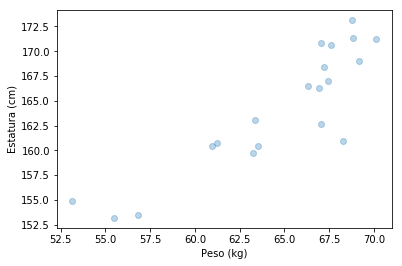

In [2]:
medias = (65, 165)
sigma = [[20, 21],
         [21, 30]]

x = np.random.multivariate_normal(mean=medias, cov=sigma, size=20)

plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.scatter(x[:,0], x[:,1], alpha=0.3);

The next function was made by [Syrtis Major](https://stackoverflow.com/users/2144720/syrtis-major)

In [3]:
from scipy.stats import norm, chi2

def cov_ellipse(cov, q=None, nsig=None, **kwargs):
    """
    Parameters
    ----------
    cov : (2, 2) array Covariance matrix.
    q : float, optional. Confidence level, should be in (0, 1)
    nsig : int, optional. Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle in degree
    for the ellipse.
    """

    if q is not None:
        q = np.asarray(q)
    elif nsig is not None:
        q = 2 * norm.cdf(nsig) - 1
    else:
        raise ValueError('One of `q` and `nsig` should be specified.')
    r2 = chi2.ppf(q, 2)

    val, vec = np.linalg.eigh(cov)
    width, height = 2 * (val[:, None] * r2)**0.5
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

A continuación la información para construir la elipse y se almacena en el objeto `elip`

In [4]:
elip = cov_ellipse(cov=sigma, q=0.50)

Para crear la elipse se usa la función `Ellipse`

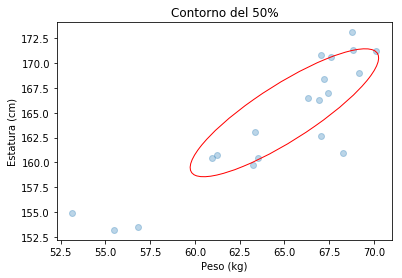

In [5]:
from matplotlib.patches import Ellipse

elipse = Ellipse(xy=medias, width=elip[0], height=elip[1], angle=elip[2], color='red')
elipse.set_facecolor('none')

ax = plt.subplot(111)
plt.scatter(x[:,0], x[:,1], alpha=0.3)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Contorno del 50%')
ax.add_artist(elipse)  # Para agregar la elipse

## Calculando las distancias de Mahalanobis

$D^2 = (\boldsymbol{X}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\boldsymbol{X}-\boldsymbol{\mu})$

In [6]:
from scipy.spatial.distance import cdist

medias = [[65, 165]]       # Vector de medias
vi = np.linalg.inv(sigma)  # Inversa de Sigma

d = cdist(XA=x, XB=medias, metric='mahalanobis', VI=vi)
d2 = d**2  # Para que genere d2, de lo contrario entrega sólo d

In [7]:
results = d2 < chi2.ppf(q=0.5, df=2)

In [8]:
sum(sum(results))  # Para saber cuántos puntos están dentro de la elipse

9